In [40]:
import datetime
from pathlib import Path

import imageio
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from tlo.analysis.life_expectancy import get_life_expectancy_estimates
from tlo.analysis.utils import (
    extract_results,
    format_gbd,
    make_age_grp_lookup,
    make_age_grp_types,
    make_calendar_period_lookup,
    make_calendar_period_type,
    summarize,
    unflatten_flattened_multi_index_in_logging,
)

min_year = 2020
max_year = 2070

results_folder = Path("/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z")
resourcefilepath = Path("/Users/rem76/PycharmProjects/TLOmodel/outputs/rm916@ic.ac.uk/longterm_trends_all_diseases-2024-09-25T110820Z")
agegrps, agegrplookup = make_age_grp_lookup()
calperiods, calperiodlookup = make_calendar_period_lookup()
births_results = extract_results(
        results_folder,
        module="tlo.methods.demography",
        key="on_birth",
        custom_generate_series=(
            lambda df: df.assign(year=df['date'].dt.year).groupby(['year'])['year'].count()
        ),
        do_scaling=True
    )
births_results = births_results.groupby(by=births_results.index).sum()
births_results = births_results.replace({0: np.nan})

births_model = summarize(births_results, collapse_columns=True)
births_model.columns = ['Model_' + col for col in births_model.columns]

 

/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:354: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'mean': results.groupby(axis=1, by='draw', sort=False).mean(),
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:355: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'lower': results.groupby(axis=1, by='draw', sort=False).quantile(0.025),
/Users/rem76/PycharmProjects/TLOmodel/src/tlo/analysis/utils.py:356: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  'upper': results.groupby(axis=1, by='draw', sort=False).quantile(0.975),


Get expected disturbance from the model?

In [41]:
scenario = 'ssp585'
model_type = 'median'

In [42]:
predictions_from_cmip = pd.read_csv(f'/Users/rem76/Desktop/Climate_change_health/Data/weather_predictions_with_X_{scenario}_{model_type}.csv')

In [43]:
predictions_from_cmip_sum = predictions_from_cmip.groupby('Year').sum().reset_index()
predictions_from_cmip_sum

,Year,Month,Facility_ID,Altitude,Zone,District,Resid,Owner,Facility_Type,Precipitation,Lag_1_Precipitation,Lag_2_Precipitation,Lag_3_Precipitation,Lag_4_Precipitation,Predicted_Weather_Model,Predicted_No_Weather_Model,Difference_in_Expectation
0,2025,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,-44.979294,398942.636170,404727.057797,405704.571665,404895.268433,462904.609783,inf,-inf
1,2026,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,332.932458,413397.817913,388309.667883,385397.116828,386621.761142,463055.752459,inf,-inf
2,2027,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,273.236578,407187.589904,420216.307417,421615.911783,421535.968891,462644.111845,inf,-inf
3,2028,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,389.408735,406189.704606,403165.981005,401105.177547,400973.159779,460807.846722,inf,-inf
4,2029,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,184.087757,420471.214026,421450.033447,424520.950185,419592.912552,463079.419720,inf,-inf
5,2030,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,224.863481,410824.557725,391493.761671,388196.210212,391638.197677,462967.863359,inf,-inf
6,2031,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,381.703350,432044.900550,456751.262273,456752.721138,456824.623648,465600.988271,inf,-inf
7,2032,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,-407.846396,348112.188236,353270.524412,357410.845800,357753.146752,459795.744898,inf,-inf
8,2033,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,80.361929,405019.687496,388565.288508,388245.552346,388673.117569,463363.585021,inf,-inf
9,2034,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,216.640767,372460.875926,375124.877747,371846.112765,373019.671935,459224.382654,inf,-inf


In [44]:
predictions_from_cmip_sum['Percentage_Difference'] = (predictions_from_cmip_sum['Difference_in_Expectation'] / predictions_from_cmip_sum['Predicted_No_Weather_Model']) 
predictions_from_cmip_sum

,Year,Month,Facility_ID,Altitude,Zone,District,Resid,Owner,Facility_Type,Precipitation,Lag_1_Precipitation,Lag_2_Precipitation,Lag_3_Precipitation,Lag_4_Precipitation,Predicted_Weather_Model,Predicted_No_Weather_Model,Difference_in_Expectation,Percentage_Difference
0,2025,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,-44.979294,398942.636170,404727.057797,405704.571665,404895.268433,462904.609783,inf,-inf,NaN
1,2026,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,332.932458,413397.817913,388309.667883,385397.116828,386621.761142,463055.752459,inf,-inf,NaN
2,2027,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,273.236578,407187.589904,420216.307417,421615.911783,421535.968891,462644.111845,inf,-inf,NaN
3,2028,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,389.408735,406189.704606,403165.981005,401105.177547,400973.159779,460807.846722,inf,-inf,NaN
4,2029,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,184.087757,420471.214026,421450.033447,424520.950185,419592.912552,463079.419720,inf,-inf,NaN
5,2030,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,224.863481,410824.557725,391493.761671,388196.210212,391638.197677,462967.863359,inf,-inf,NaN
6,2031,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,381.703350,432044.900550,456751.262273,456752.721138,456824.623648,465600.988271,inf,-inf,NaN
7,2032,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,-407.846396,348112.188236,353270.524412,357410.845800,357753.146752,459795.744898,inf,-inf,NaN
8,2033,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,80.361929,405019.687496,388565.288508,388245.552346,388673.117569,463363.585021,inf,-inf,NaN
9,2034,25584,643536,3435564.0,Central WestSouth EastNorthernSouth EastNorthe...,LilongweBalakaRumphiMulanjeMzimba SouthThyoloN...,UrbanUrbanUrbanRuralRuralRuralRuralRuralRuralR...,GovernmentGovernmentGovernmentGovernmentGovern...,ClinicDistrict HospitalRural/Community Hospita...,216.640767,372460.875926,375124.877747,371846.112765,373019.671935,459224.382654,inf,-in

In [45]:
X_Data = pd.read_csv(f'/Users/rem76/Desktop/Climate_change_health/Data/X_basis_weather_filtered_predictions_{scenario}_{model_type}.csv')


In [51]:
X_Data

,0,1,2,3,4,5,6,7,8,9,...,371,372,373,374,375,376,377,378,379,380
0,1.048343,0.810635,-1.694798,-1.593255,0.865784,-0.556619,-0.692498,-0.784889,0.216669,-0.375922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.774797,1.999924,-1.694798,-1.303572,1.367884,-0.393471,-0.694058,-0.773609,0.680066,-0.192419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.370042,1.374079,-1.694798,-1.013890,0.899921,0.022860,-0.730727,-0.754700,0.439918,0.251719,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.193023,2.566294,-1.694798,-0.724207,1.848773,-0.140611,-0.468354,-0.736643,1.007995,0.270999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.750054,0.914118,-1.694798,-0.434524,1.545592,-0.292019,-0.624782,-0.758322,1.243891,-0.091395,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181051,2.124416,1.864759,1.694798,0.434524,1.083275,-0.534858,-0.713874,-0.555571,1.947227,-0.539065,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
181052,0.616089,0.497958,1.694798,0.724207,0.038357,-0.580187,-0.773157,-0.761919,-0.221811,-0.538509,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
181053,0.616089,0.497958,1.694798,1.013890,0.038357,-0.580187,-0.773157,-0.761919,-0.221811,-0.538509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
181054,1.677813,1.075421,1.694798,1.303572,0.519968,-0.603433,-0.700931,-0.685821,0.667956,-0.652100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
births_model_subset = births_model.iloc[15:].copy()

matching_rows = min(len(births_model_subset), len(predictions_from_cmip_sum))

multiplied_values = births_model_subset.head(matching_rows).iloc[:, 1].values * predictions_from_cmip_sum['Percentage_Difference'].head(matching_rows).values

births_model_subset['Multiplied_Values'] = multiplied_values

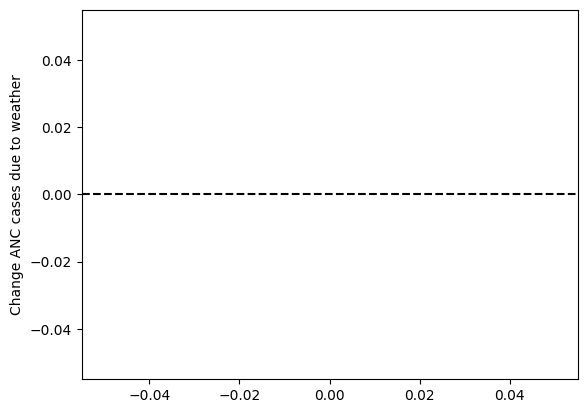

In [47]:
year_range = range(2025, 2061)

plt.plot(year_range, multiplied_values)
plt.ylabel("Change ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--') 

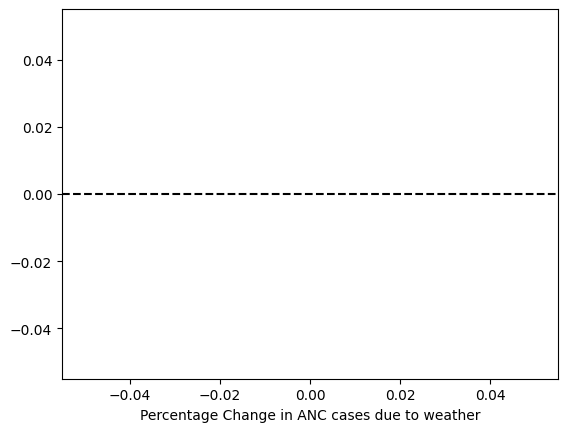

In [48]:
plt.plot(year_range, predictions_from_cmip_sum.iloc[0:36, -1]*100)
plt.xlabel("Percentage Change in ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--') 

# Negative values - missed cases?

In [49]:
negative_sum = np.sum(multiplied_values[multiplied_values < 0])

print("Sum of values < 0:", negative_sum)
print(negative_sum/births_model_subset['Model_mean'].sum() * 100)


Sum of values < 0: 0.0
0.0


Difference by Zone

/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_17473/4003818095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Percentage_Difference'] = (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_17473/4003818095.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Percentage_Difference'] = (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
/var

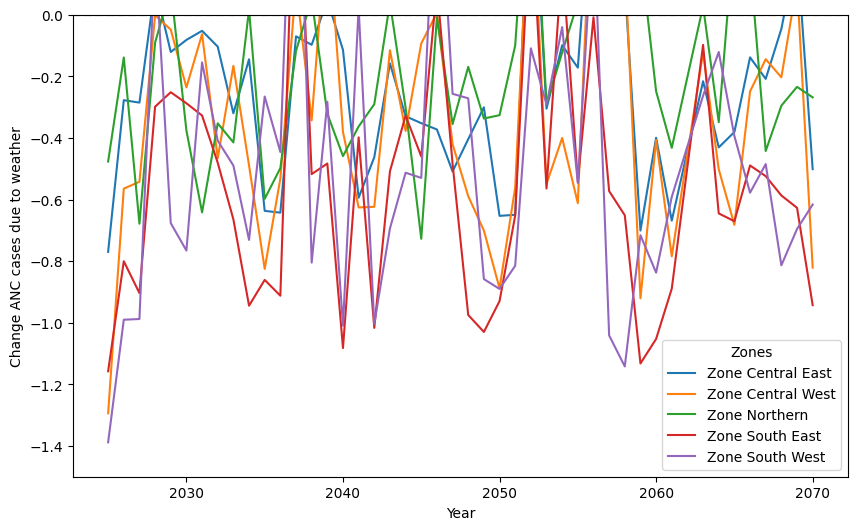

In [36]:
predictions_from_cmip_sum = predictions_from_cmip.groupby(['Year', 'Zone']).sum().reset_index()

# Plot each zone
plt.figure(figsize=(10, 6))
for zone in predictions_from_cmip_sum['Zone'].unique():
    zone_data = predictions_from_cmip_sum[predictions_from_cmip_sum['Zone'] == zone]
    zone_data['Percentage_Difference'] = (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
    plt.plot(zone_data['Year'], zone_data['Percentage_Difference'], label=f'Zone {zone}')

plt.xlabel("Year")
plt.ylabel("Change ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-1.5, 0)
plt.legend(title='Zones')
plt.show()

District

/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_18188/3611777628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  district_data['Percentage_Difference'] = (district_data['Difference_in_Expectation'] / district_data['Predicted_No_Weather_Model']) * 100


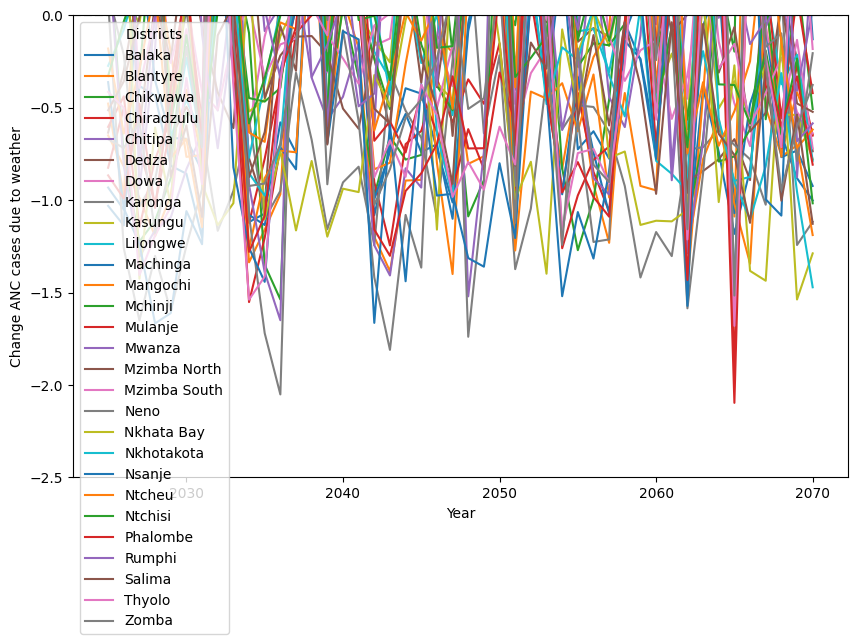

In [35]:
predictions_from_cmip_sum = predictions_from_cmip.groupby(['Year', 'District']).sum().reset_index()

# Plot each zone
plt.figure(figsize=(10, 6))
for district in predictions_from_cmip_sum['District'].unique():
    district_data = predictions_from_cmip_sum[predictions_from_cmip_sum['District'] == district]
    district_data['Percentage_Difference'] = (district_data['Difference_in_Expectation'] / district_data['Predicted_No_Weather_Model']) * 100
    plt.plot(district_data['Year'], district_data['Percentage_Difference'], label=f'{district}')

plt.xlabel("Year")
plt.ylabel("Change ANC cases due to weather")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-2.5, 0)
plt.legend(title='Districts')
plt.show()

# Loop over all 

In [36]:
model_types = ['lowest', 'median', 'highest']
ssp_scenarios = ["ssp245", "ssp585"]

results_list = []

for scenario in ssp_scenarios:
    for model_type in model_types:
        predictions_from_cmip = pd.read_csv(f'/Users/rem76/Desktop/Climate_change_health/Data/weather_predictions_with_X_{scenario}_{model_type}.csv')
        predictions_from_cmip['Percentage_Difference'] = (
            predictions_from_cmip['Difference_in_Expectation'] / 
            predictions_from_cmip['Predicted_No_Weather_Model']
        ) * 100
        
        births_model_subset = births_model.iloc[15:].copy()
        matching_rows = min(len(births_model_subset), len(predictions_from_cmip))
        multiplied_values = (
            births_model_subset.head(matching_rows).iloc[:, 1].values *
            predictions_from_cmip['Percentage_Difference'].head(matching_rows).values
        )
        
        births_model_subset['Multiplied_Values'] = multiplied_values
        
        for zone in predictions_from_cmip['Zone'].unique():
            zone_data = predictions_from_cmip[predictions_from_cmip['Zone'] == zone]
            zone_data['Percentage_Difference'] = (
                (zone_data['Difference_in_Expectation'] / zone_data['Predicted_No_Weather_Model']) * 100
            )
            
            results_list.append({
                "Scenario": scenario,
                "Model_Type": model_type,
                "Zone": zone,
                "Percentage_Difference": zone_data['Percentage_Difference'].mean(),
                "Multiplied_Values": multiplied_values.mean()
            })

        

/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_18188/3827770855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Percentage_Difference'] = (
/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_18188/3827770855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Percentage_Difference'] = (
/var/folders/1z/j8w4v5lj4k580xt42fkwh7dw0000gn/T/ipykernel_18188/3827770855.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [37]:
results_list

[{'Scenario': 'ssp245',
  'Model_Type': 'lowest',
  'Zone': 'Central West',
  'Percentage_Difference': -0.1931910818987726,
  'Multiplied_Values': nan},
 {'Scenario': 'ssp245',
  'Model_Type': 'lowest',
  'Zone': 'South East',
  'Percentage_Difference': -0.3314323561856577,
  'Multiplied_Values': nan},
 {'Scenario': 'ssp245',
  'Model_Type': 'lowest',
  'Zone': nan,
  'Percentage_Difference': nan,
  'Multiplied_Values': nan},
 {'Scenario': 'ssp245',
  'Model_Type': 'lowest',
  'Zone': 'Northern',
  'Percentage_Difference': -0.24607017494457492,
  'Multiplied_Values': nan},
 {'Scenario': 'ssp245',
  'Model_Type': 'lowest',
  'Zone': 'South West',
  'Percentage_Difference': -0.47686076003686034,
  'Multiplied_Values': nan},
 {'Scenario': 'ssp245',
  'Model_Type': 'lowest',
  'Zone': 'Central East',
  'Percentage_Difference': -0.11908906889403516,
  'Multiplied_Values': nan},
 {'Scenario': 'ssp245',
  'Model_Type': 'median',
  'Zone': 'Central West',
  'Percentage_Difference': -0.36628333

# Try add a map 

Change names of some "districts" for consistency 

In [38]:
predictions_from_cmip_sum['District'] = predictions_from_cmip_sum['District'].replace("Mzimba North", "Mzimba")
predictions_from_cmip_sum['District'] = predictions_from_cmip_sum['District'].replace("Mzimba South", "Mzimba")


RuntimeError: You must first define an image, e.g., with imshow

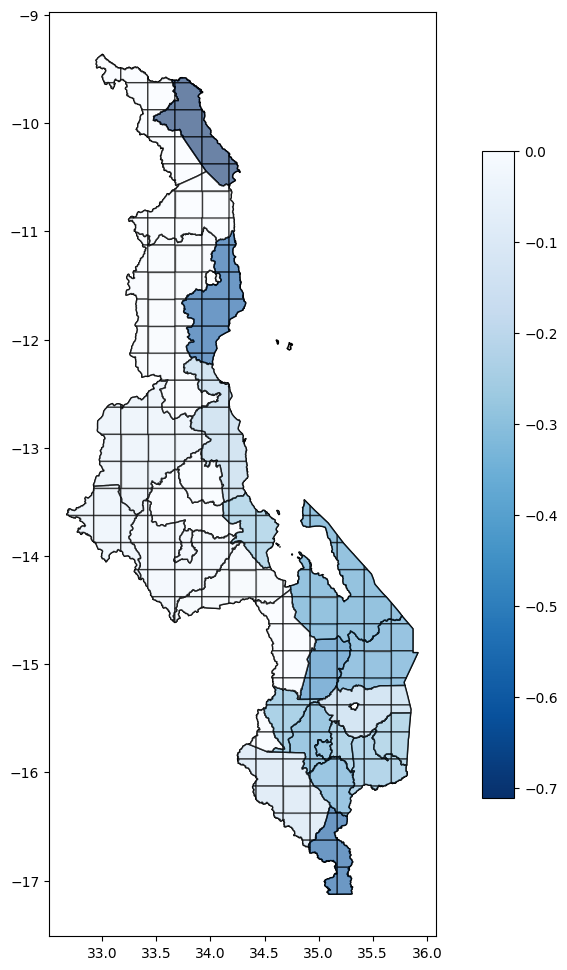

In [39]:
import geopandas as gpd
from netCDF4 import Dataset
from shapely.geometry import Polygon
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file_path_historical_data = "/Users/rem76/Desktop/Climate_change_health/Data/Precipitation_data/Historical/daily_total/2011/60ab007aa16d679a32f9c3e186d2f744.nc"
dataset = Dataset(file_path_historical_data, mode='r')
pr_data = dataset.variables['tp'][:]
lat_data = dataset.variables['latitude'][:]
long_data = dataset.variables['longitude'][:]
meshgrid_from_netCDF = np.meshgrid(long_data, lat_data)

malawi = gpd.read_file("/Users/rem76/PycharmProjects/TLOmodel/resources/mapping/ResourceFile_mwi_admbnda_adm0_nso_20181016.shp")
malawi_admin2 = gpd.read_file("/Users/rem76/PycharmProjects/TLOmodel/resources/mapping/ResourceFile_mwi_admbnda_adm2_nso_20181016.shp")

# change names of some districts for consistency 
predictions_from_cmip_sum['District'] = predictions_from_cmip_sum['District'].replace("Mzimba North", "Mzimba")
predictions_from_cmip_sum['District'] = predictions_from_cmip_sum['District'].replace("Mzimba South", "Mzimba")
malawi_admin2['ADM2_EN'] = malawi_admin2['ADM2_EN'].replace('Blantyre City', 'Blantyre')
malawi_admin2['ADM2_EN'] = malawi_admin2['ADM2_EN'].replace('Mzuzu City', 'Mzuzu')
malawi_admin2['ADM2_EN'] = malawi_admin2['ADM2_EN'].replace('Lilongwe City', 'Lilongwe')

difference_lat = lat_data[1] - lat_data[0]
difference_long = long_data[1] - long_data[0]

polygons = []
for x in long_data:
    for y in lat_data:
        bottom_left = (x, y)
        bottom_right = (x + difference_long, y)
        top_right = (x + difference_long, y + difference_lat)
        top_left = (x, y + difference_lat)
        polygon = Polygon([bottom_left, bottom_right, top_right, top_left])
        polygons.append(polygon)
grid = gpd.GeoDataFrame({'geometry': polygons}, crs=malawi.crs)

grid_clipped_ADM2 = gpd.overlay(grid, malawi_admin2, how='intersection')

# Read predictions and calculate Percentage_Difference
predictions_from_cmip_sum['Percentage_Difference'] = (
    predictions_from_cmip_sum['Difference_in_Expectation'] / predictions_from_cmip_sum['Predicted_No_Weather_Model']
) * 100

percentage_diff_by_district = predictions_from_cmip_sum.groupby('District')['Percentage_Difference'].mean()
grid_clipped_ADM2['Percentage_Difference'] = grid_clipped_ADM2['ADM2_EN'].map(percentage_diff_by_district)


fig, ax = plt.subplots(figsize=(12, 12))

malawi_admin2.plot(ax=ax, edgecolor='black', color='white')
grid_clipped_ADM2.loc[grid_clipped_ADM2['Percentage_Difference'] > 0, 'Percentage_Difference'] = 0


grid_clipped_ADM2.dropna(subset=['Percentage_Difference']).plot(
    ax=ax,
    column='Percentage_Difference',
    cmap='Blues_r',
    edgecolor='black',
    alpha=0.6,
    legend=False
)

sm = plt.cm.ScalarMappable(cmap='Blues_r', norm=mcolors.Normalize(
    vmin=grid_clipped_ADM2['Percentage_Difference'].min(), vmax=grid_clipped_ADM2['Percentage_Difference'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="vertical", shrink=0.7)
plt.clim(grid_clipped_ADM2['Percentage_Difference'].min(), 0)
cbar.set_label("Percentage Difference (%)", fontsize=12)

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.title("Malawi Districts by Percentage Difference", fontsize=16)
plt.tight_layout()

plt.show()


In [ ]:
# Get unique districts from both sources
adm2_districts = set(grid_clipped_ADM2['ADM2_EN'].unique())
prediction_districts = set(predictions_from_cmip_sum['District'].unique())

# Districts in ADM2 but not in predictions
missing_in_predictions = adm2_districts - prediction_districts
print("Districts in ADM2 but not in predictions:", missing_in_predictions)

# Districts in predictions but not in ADM2
missing_in_adm2 = prediction_districts - adm2_districts
print("Districts in predictions but not in ADM2:", missing_in_adm2)